## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D

### 3.1 Drawing Phase Portrait with different alphas

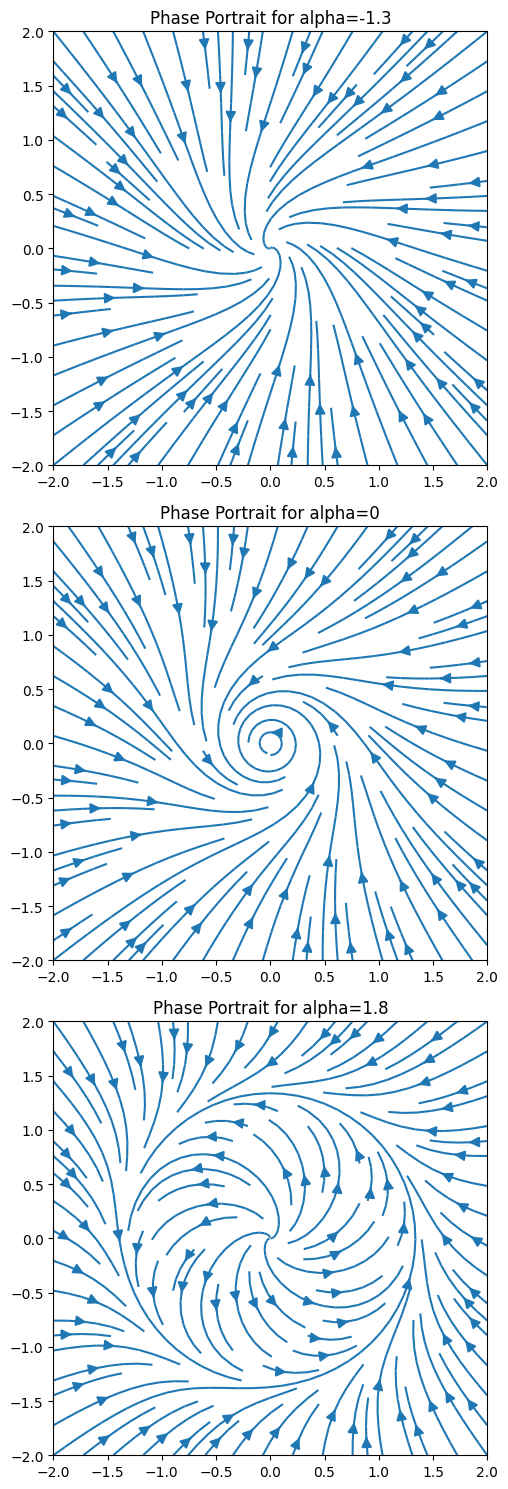

In [2]:
# Define the system
def andronov_hopf(x, y, alpha):
    dxdt = alpha * x - y - x * (x**2 + y**2)
    dydt = x + alpha * y - y * (x**2 + y**2)
    return dxdt, dydt

#Define parameters
alpha_values = [-1.3, 0, 1.8]  #Representative alpha values

#Define the grid
w = 2
Y, X = np.mgrid[-w:w:100j, -w:w:100j]


#Plot phase diagrams using streamplot
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(nrows=3, ncols=1)

#for each alpha value by using our definition of Andronov-Hopf Bifurcation, draws phase portrait
for i, alpha in enumerate(alpha_values, 1):
    ax = fig.add_subplot(gs[i-1, 0])
    U, V = andronov_hopf(X, Y, alpha)
    ax.streamplot(X, Y, U, V, density=1, arrowsize=1.5)
    ax.set_title(f"Phase Portrait for alpha={alpha}")
    ax.set_aspect(1)

plt.tight_layout()
plt.show()

### 3.2 Orbits

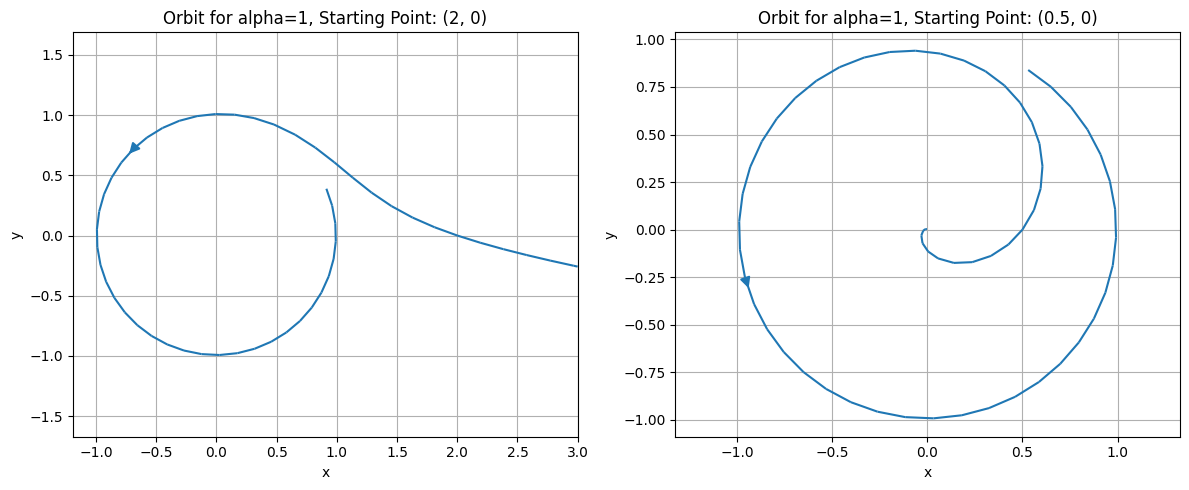

In [3]:
#Define the system function for alpha = 1
def andronov_hopf(x, y):
    alpha = 1
    dxdt = alpha * x - y - x * (x**2 + y**2)
    dydt = x + alpha * y - y * (x**2 + y**2)
    return dxdt, dydt

#Create a grid of x, y values
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)

#Calculate vector field values using the defined system function
U, V = andronov_hopf(X, Y)

#Create separate streamplots for different starting points
plt.figure(figsize=(12, 5))

#Streamplot for initial condition (2, 0)
plt.subplot(1, 2, 1)
plt.streamplot(X, Y, U, V, density=1, arrowsize=1.5, start_points=[[2, 0]])
plt.title('Orbit for alpha=1, Starting Point: (2, 0)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')

#Streamplot for initial condition (0.5, 0)
plt.subplot(1, 2, 2)
plt.streamplot(X, Y, U, V, density=1, arrowsize=1.5, start_points=[[0.5, 0]])
plt.title('Orbit for alpha=1, Starting Point: (0.5, 0)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()


### 3.3 The Cusp Bifurcation in a 3D plot

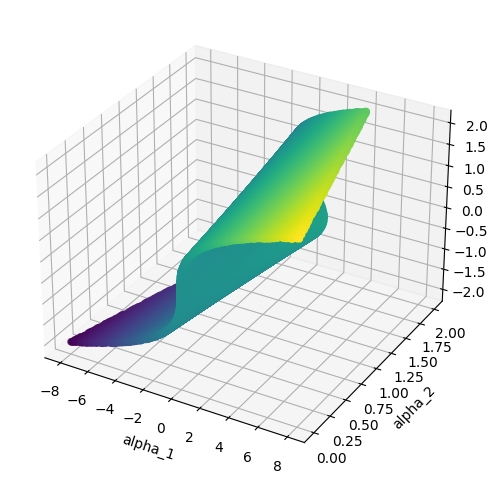

In [4]:
#Samples alpha2 and x in uniform distribution
def generate_samples(n, alpha_two_limit, x_limit):
    a2_samples = np.random.uniform(0, alpha_two_limit, n)
    x_samples = np.random.uniform(-x_limit, x_limit, n)
    return a2_samples, x_samples

#We are using the point x_dot == 0, that is why a1 = -a2 * x + x^3
def calculate_a1(a2_samples, x_samples):
    a1_samples = -a2_samples * x_samples + x_samples ** 3
    return a1_samples

#this function plots 3d figure from the samples
def plot_3d(a1_samples, a2_samples, x_samples):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    #putting all samples into scatter plot, color changes according to alpha1
    ax.scatter(a1_samples, a2_samples, x_samples, c=a1_samples, cmap='viridis')
    ax.set_xlabel("alpha_1")
    ax.set_ylabel("alpha_2")
    ax.set_zlabel("x")
    plt.show()

#Parameters
n = 100000 #at least this number of samples to makes the plot smooth
alpha_two_limit = 2
x_limit = 2

#Generate samples
a2_samples, x_samples = generate_samples(n, alpha_two_limit, x_limit)

#Calculate alpha1
a1_samples = calculate_a1(a2_samples, x_samples)

#Create 3D plot
plot_3d(a1_samples, a2_samples, x_samples)
